<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv"
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [69]:
us_pop = 329968629  #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US: {res.positive/us_pop*100:2f}%")

positive    118234
negative    617470
pending      65712
total       801416
dtype: int64
Current Infection Rate 14.753137%
Percentage of US: 0.035832%


In [70]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative
37,NY,52318,103616
34,NJ,11124,19386
5,CA,4643,20549
21,MA,4257,30792
10,FL,3763,35366
52,WA,3723,49015
24,MI,3657,9109
16,IL,3491,22000
20,LA,3315,21846
41,PA,2751,25254


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [72]:
dfUSAPos[-7:]

,date,positive,PCT
18,20200322,31879,0.269626
19,20200323,42152,0.356513
20,20200324,51954,0.439417
21,20200325,63928,0.540690
22,20200326,80735,0.682841
23,20200327,99413,0.840816
24,20200328,118234,1.000000


In [73]:
dfCAPos[-7:]

,date,positive,PCT
18,20200322,1536,0.330821
19,20200323,1733,0.373250
20,20200324,2102,0.452725
21,20200325,2355,0.507215
22,20200326,3006,0.647426
23,20200327,3879,0.835451
24,20200328,4643,1.000000


In [74]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200324,51954,292758,14433,4468.0,675,359145,344712,204.0,1143.0,55437.0,9802.0,65239.0
20200325,63928,357604,51235,6136.0,900,472767,421532,225.0,1668.0,64846.0,11974.0,76820.0
20200326,80735,438603,60251,10131.0,1163,579589,519338,264.0,3996.0,80999.0,16807.0,97806.0
20200327,99413,527220,60094,13717.0,1530,686727,626633,367.0,3652.0,88617.0,18678.0,107295.0
20200328,118234,617470,65712,16729.0,1965,801416,735704,435.0,3012.0,90250.0,18821.0,109071.0


In [96]:
gbCA.sum()[-5:]

ERROR! Session/line number was not unique in database. History logging moved to new session 61


,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200324,2102,13452,12100,0.0,40,27654,15554,13.0,0.0,885.0,369.0,1254.0
20200325,2355,15921,48600,0.0,53,66876,18276,13.0,0.0,2469.0,253.0,2722.0
20200326,3006,17380,57400,0.0,65,77786,20386,12.0,0.0,1459.0,651.0,2110.0
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0


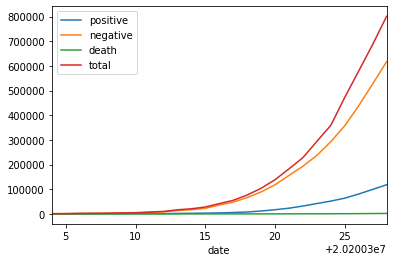

In [75]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [76]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
20200315,1678,41
20200316,1678,41
20200317,3503,58
20200318,3536,58
20200319,7087,100
20200320,10442,150
20200321,15219,201
20200322,15219,201
20200323,31573,402


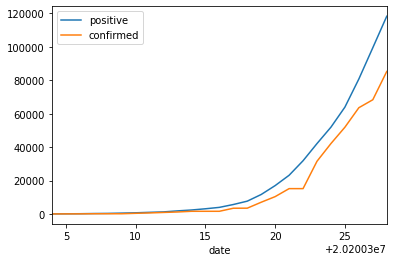

In [77]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [78]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200322,1536,11304,0,0.0,27,12840,12840,3.0,0.0,55.0,257.0,312.0
20200323,1733,12567,12100,0.0,27,26400,14300,0.0,0.0,1263.0,197.0,1460.0
20200324,2102,13452,12100,0.0,40,27654,15554,13.0,0.0,885.0,369.0,1254.0
20200325,2355,15921,48600,0.0,53,66876,18276,13.0,0.0,2469.0,253.0,2722.0
20200326,3006,17380,57400,0.0,65,77786,20386,12.0,0.0,1459.0,651.0,2110.0
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0


In [79]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    121478
dead           2026
dtype: int64

In [80]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    5095
dead          110
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [82]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                121478
Italy              92472
China              81999
Spain              73235
Germany            57695
France             38105
Iran               35408
United Kingdom     17312
Switzerland        14076
Netherlands         9819
Name: confirmed, dtype: int64

In [83]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(20)

country
US                121478
Italy              92472
China              81999
Spain              73235
Germany            57695
France             38105
Iran               35408
United Kingdom     17312
Switzerland        14076
Netherlands         9819
Korea, South        9478
Belgium             9134
Austria             8271
Turkey              7402
Canada              5576
Portugal            5170
Norway              4015
Brazil              3904
Australia           3640
Israel              3619
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [88]:
dfState.loc['NY'].head(7)

,date,positive,current_total,pct
state,,,,
NY,20200328,52318,52318,1.000000
NY,20200327,44635,52318,0.853148
NY,20200326,37258,52318,0.712145
NY,20200325,30811,52318,0.588918
NY,20200324,25665,52318,0.490558
NY,20200323,20875,52318,0.399002
NY,20200322,15168,52318,0.289919


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

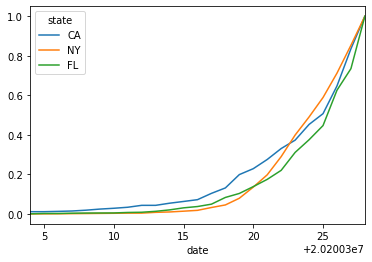

In [90]:
x = res.loc[:, ['CA','NY','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

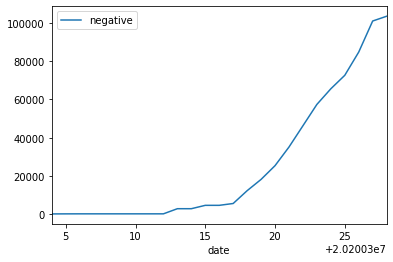

In [92]:
x = dfNYTesting.plot.line()

In [93]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['GA']))].head(10)

,state,date,positive,current_total,pct
249,GA,20200328,2366,2366,1.000000
250,GA,20200327,2001,2366,0.845731
251,GA,20200326,1525,2366,0.644548
252,GA,20200325,1247,2366,0.527050
253,GA,20200324,1026,2366,0.433643
254,GA,20200323,772,2366,0.326289
255,GA,20200322,600,2366,0.253593
256,GA,20200321,507,2366,0.214286
257,GA,20200320,420,2366,0.177515
258,GA,20200319,287,2366,0.121302


In [95]:
datecutoff = int(((pd.to_datetime(str(dfDates.date.max())))-datetime.timedelta(days=4)).strftime("%Y%m%d"))
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .50)].sort_values(by='positive',ascending=False)


,state,date,positive,current_total,pct
838,NY,20200324,25665,52318,0.490558
767,NJ,20200324,3675,11124,0.330367
110,CA,20200324,2102,4643,0.452725
545,MI,20200324,1791,3657,0.489746
358,IL,20200324,1535,3491,0.439702
228,FL,20200324,1412,3763,0.375233
452,LA,20200324,1388,3315,0.418703
474,MA,20200324,1159,4257,0.272257
253,GA,20200324,1026,2366,0.433643
934,PA,20200324,851,2751,0.309342
